In this file, the data is analysed to awnser the questions posed in the practicum manual.
Furthermore we will leave remarks and explanations throughout this file on the various plots as well as on any anomolies.

Firstly let us take a look at the V-I curve for the squid at room temperature.

In [1]:
from autoplot import *
import numpy as np
from scipy.optimize import curve_fit

# Even de working directory veranderen omdat de notebook in een andere map staat dan de data.
import os
os.chdir('2022_2023_round_09')

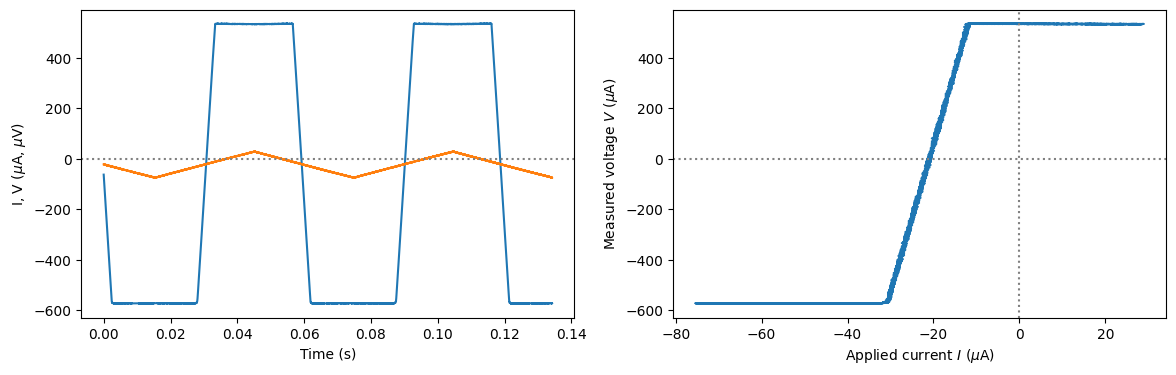

In [2]:
plot_V_I('mrsquid_V-I_2023-02-15-14_19_13.dat')

This is the first plot we saw, there is a nice linear part in the center, however at both edges, there seems to be a maximum value for the voltage. Luckily with our knowledge from the kickoff meeting we were quickly able to determine this is simply an artifact of the measurement equipment, where +-600 $\mu$V is the maximum value that can be measured.
When the amplitude is turned down to a reasonable level, this is what the V-I curve looks like at room temperature.

/tmp/ipykernel_157/2504107000.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


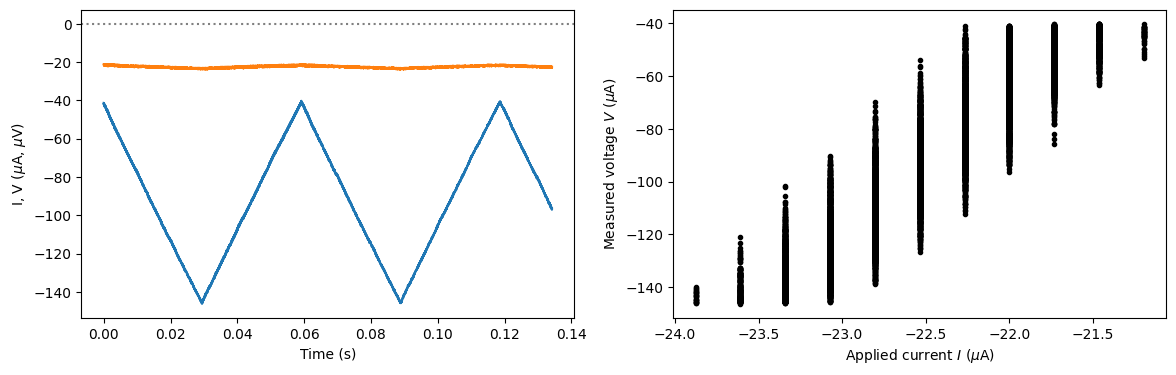

In [3]:
#plot_V_I('mrsquid_V-I_2023-02-15-14_21_22.dat')

#This code is adapted from the autoplot library found in jupyter notebook
t_1,i_1,v_1 = np.loadtxt('mrsquid_V-I_2023-02-15-14_21_22.dat', unpack=True)
plt.subplots(figsize=(14,4))
plt.subplot(121)
plt.plot(t_1,v_1)
plt.plot(t_1,i_1)
plt.xlabel("Time (s)")
plt.ylabel("I, V ($\mu$A, $\mu$V)")
plt.axhline(0,ls=':',c='grey')
plt.subplot(122)
plt.plot(i_1,v_1,'k.')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$A)")
plt.show()

This data looks very noisy. Also the measure value for the Applied current is for some reason only at certain evenly spaced values. I am currently unaware if this is caused by the electronical equipment or if there is another reason for this. I also do not know if and how this might affect an attempt at fitting a curve through these points. Since there are multiple sweeps across the measurement range, let's sort the data, and then use bin averaging, following the example set in the file called "Advanced analysis". Two runs taken two seconds apart will also be plotted together. Remember that the value given by the provided manual indicated the resistance was around 50$\Omega$ at room temperature. Firstly let's look at the second dataset.

/tmp/ipykernel_157/2036732551.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


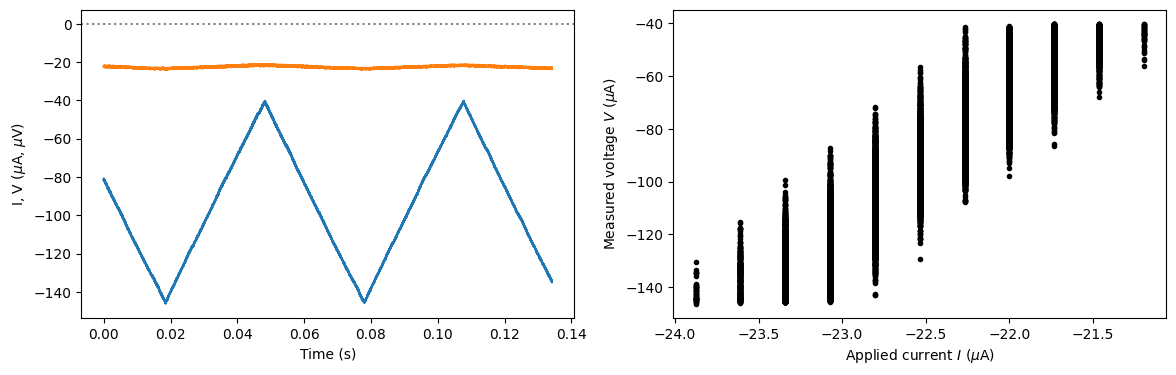

/tmp/ipykernel_157/2036732551.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


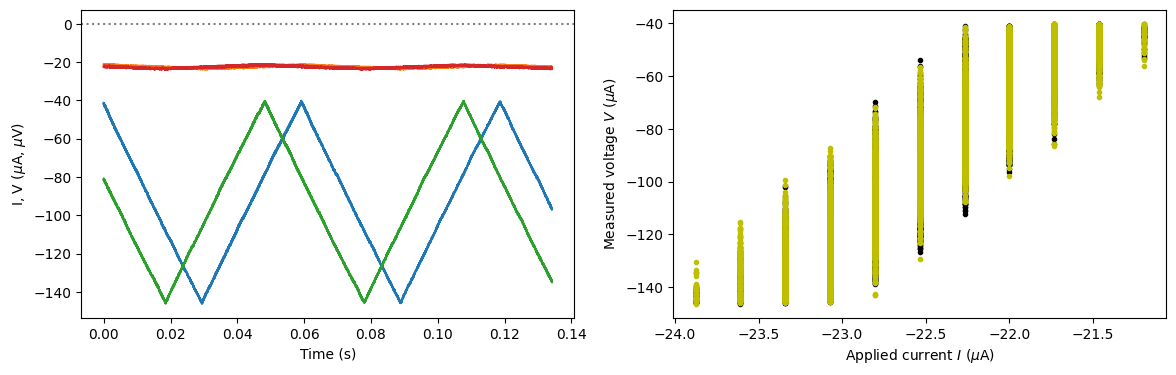

In [4]:
#plot_V_I('mrsquid_V-I_2023-02-15-14_21_22.dat')

#This code is adapted from the autoplot library found in jupyter notebook
t_2,i_2,v_2 = np.loadtxt('mrsquid_V-I_2023-02-15-14_21_24.dat', unpack=True)
#Firstly let's look at the other dataset
plt.subplots(figsize=(14,4))
plt.subplot(121)
plt.plot(t_2,v_2)
plt.plot(t_2,i_2)
plt.xlabel("Time (s)")
plt.ylabel("I, V ($\mu$A, $\mu$V)")
plt.axhline(0,ls=':',c='grey')
plt.subplot(122)
plt.plot(i_2,v_2,'k.')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$A)")
plt.show()
#Plotting the two sets on top of eachother to check they are similar
plt.subplots(figsize=(14,4))
plt.subplot(121)
plt.plot(t_1,v_1)
plt.plot(t_1,i_1)
plt.plot(t_2,v_2)
plt.plot(t_2,i_2)
plt.xlabel("Time (s)")
plt.ylabel("I, V ($\mu$A, $\mu$V)")
plt.axhline(0,ls=':',c='grey')
plt.subplot(122)
plt.plot(i_1,v_1,'k.')
plt.plot(i_2,v_2,'y.')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$A)")
plt.show()

This set looks similar to the first one. There is however a fase difference. This might be solved by the sorting algorithm

16384 16384 32768
/tmp/ipykernel_157/3894448909.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


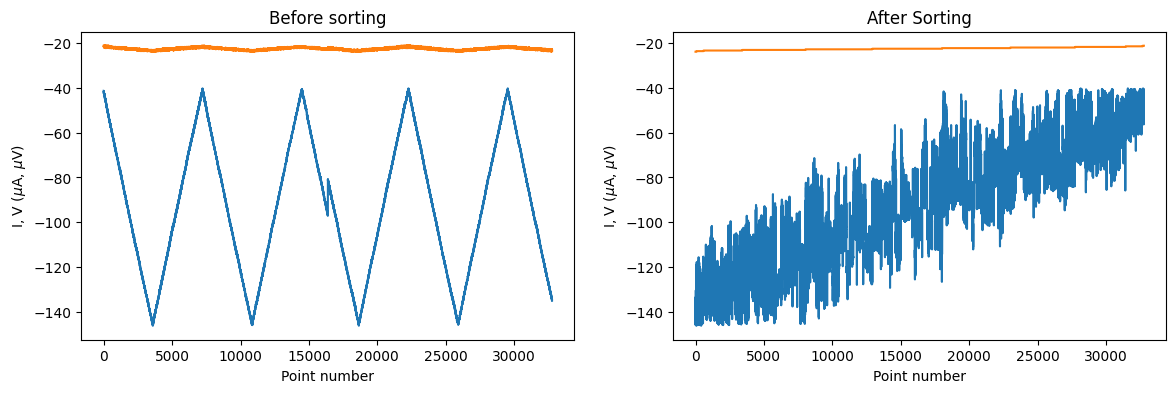

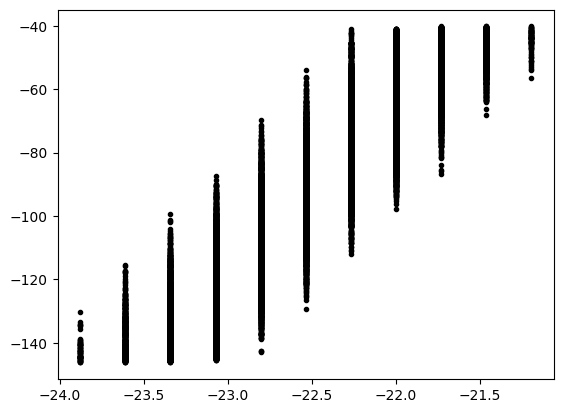

In [5]:
i_total=np.concatenate((i_1,i_2))
print(len(i_1),len(i_2),len(i_total))
v_total=np.concatenate((v_1,v_2))

# The number of points we will average together
n=2400

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_total)

i_s = i_total[ind]
v_s = v_total[ind]

plt.subplots(figsize=(14,4))
plt.subplot(121)
plt.plot(v_total)
plt.plot(i_total)
plt.xlabel("Point number")
plt.ylabel("I, V ($\mu$A, $\mu$V)")
plt.title("Before sorting")
plt.subplot(122)
plt.plot(v_s)
plt.plot(i_s)
plt.xlabel("Point number")
plt.ylabel("I, V ($\mu$A, $\mu$V)")
plt.title("After Sorting")
plt.show()

plt.figure()
plt.plot(i_s,v_s,'k.')
plt.show()

This sorted data is still very noisy, however that's nothing a little bin averaging can't help.

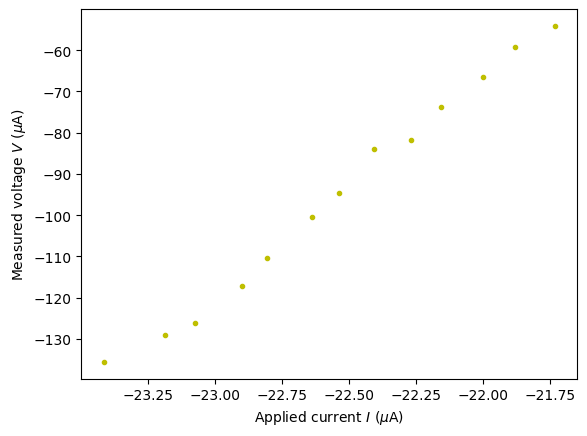

In [6]:
# An appropriate averaging code to use 
# (see https://github.com/gsteele13/gary-misc-notebooks/blob/master/Bin%20Average.md)

def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.plot(i_f,v_f,'y.')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$A)")
plt.show()

Trying several different numbers for the number of points per bin, the hinderence of the measurement of the current is clear. Pushing on with taking the derivative of the found points, the resistance is determined in the following cell.

/work/2022_2023_round_09/figures


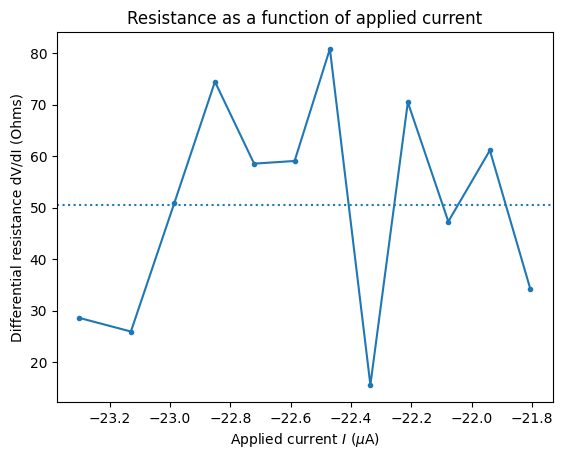

The average found resistance is  50.5955


In [7]:
# We use np.diff to make an array that calculates the difference of adjacent point
# Note that since the x-axis (i) is not uniformly gridded, we need to calculate for each 
# specific point what the difference is...
di = np.diff(i_f)
dv = np.diff(v_f)

# Now we calculate R
R = dv/di
my_path = os.path.abspath('figures')
print(my_path)
# Note that R has one less point than i: we need to define a new i vector with fewer points
# This line of code will do that and make our calculation above equivalent to the center
# difference approximation of the derivative
i_R = (i_f[1:]+i_f[:-1])/2
avg_R=np.mean(R)
plt.figure()
plt.plot(i_R,R, '.-')
plt.axhline(avg_R,ls=':')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Differential resistance dV/dI (Ohms)")
plt.savefig('/work/figures/resistance at room temperature')
plt.title("Resistance as a function of applied current")
plt.show()
print('The average found resistance is ',round(avg_R,4))

This value is really close to the expected 50 ohms, I'd call this a succes.
Taking another approach to this question, let's use a curve fit.

[  50.46470261 1042.18111414] [0.11082342 2.49286687]


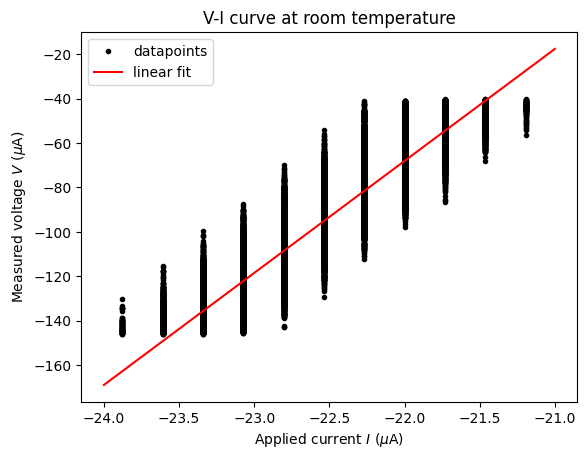

In [8]:
#i_total and v_total are the x and y values
#Let's create a linear function to fit to
def linear(x,a,b):
    return a*x+b

popt,pcov=curve_fit(linear,i_total,v_total) #other arguments to be changed for statistical uncertainty analysis
print(popt,np.sqrt(np.diag(pcov)))

x=np.linspace(-24,-21,101)

plt.figure()
plt.plot(i_total,v_total,'k.',label="datapoints")
plt.plot(x,linear(x,popt[0],popt[1]),'r',label='linear fit')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$A)")
plt.legend()
plt.title("V-I curve at room temperature")
plt.savefig('/work/figures/resistance at room temperature curvefit')
plt.show()

Once again we find the resistance to be around 50 ohms, a little further away this time.

# I-V plot at superconducting temperature (77K)

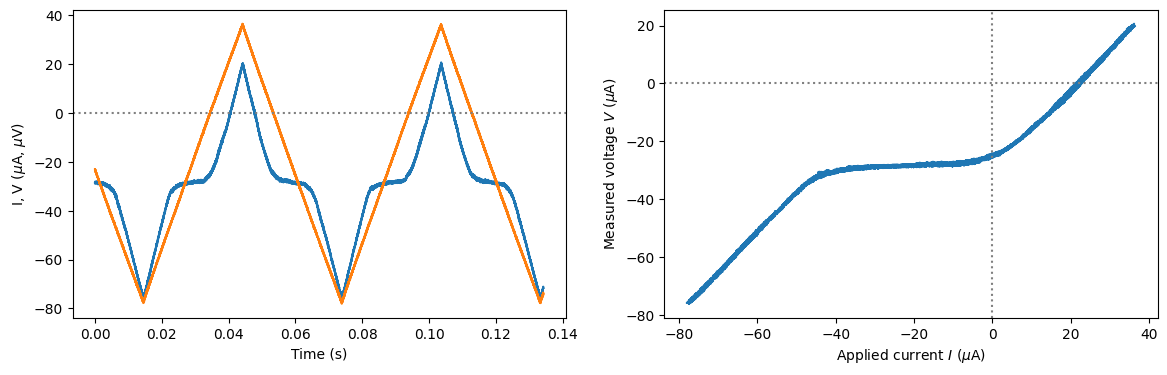

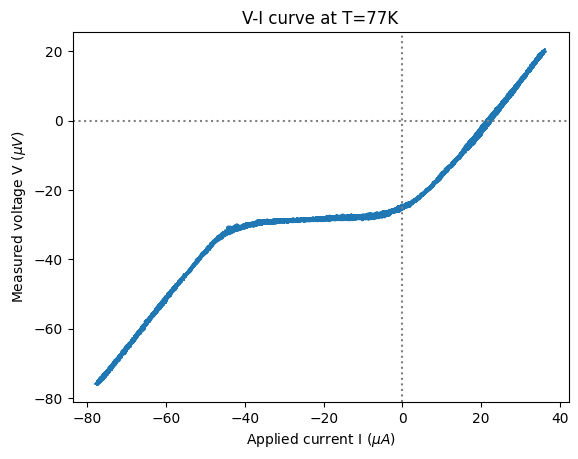

In [9]:
plot_V_I('mrsquid_V-I_2023-02-15-14_34_58.dat')
t,i,v = np.loadtxt('mrsquid_V-I_2023-02-15-14_34_58.dat', unpack=True)
plt.figure()
plt.plot(i,v)
plt.axhline(0,ls=':',c="grey")
plt.axvline(0,ls=':',c="grey")
plt.xlabel("Applied current I $(\mu A)$")
plt.ylabel("Measured voltage V $(\mu V)$")
plt.title("V-I curve at T=77K")

plt.savefig('/work/figures/VIcurve')
plt.show()

Here we see the I-V curve at superconducting temperature. Very visible is the superconducting region on the middle,which is not super flat at first glance, and there are nice 'knees' at around -42$\mu$A and 0$\mu$A.
To find the resistance in the superconducting region, let's look at another measurement where the sweep current amplitude was decreased to ensure the applied current was less than the critical current.

/tmp/ipykernel_157/3885849493.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


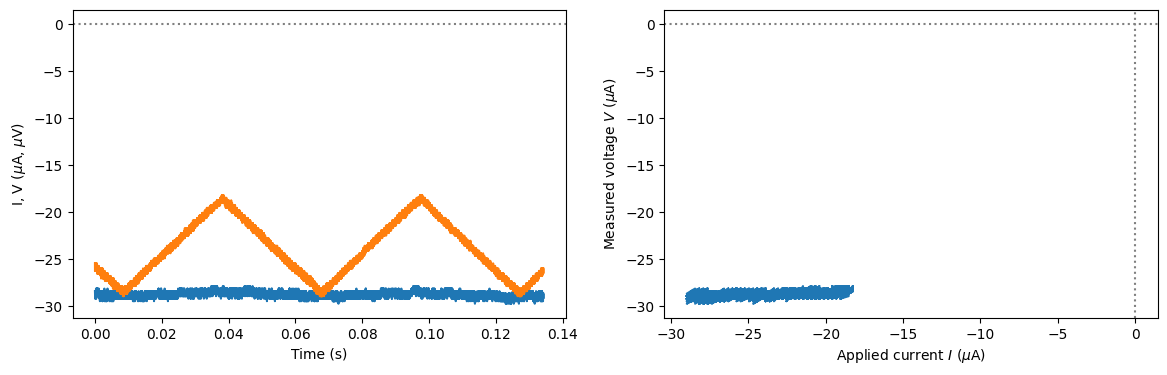

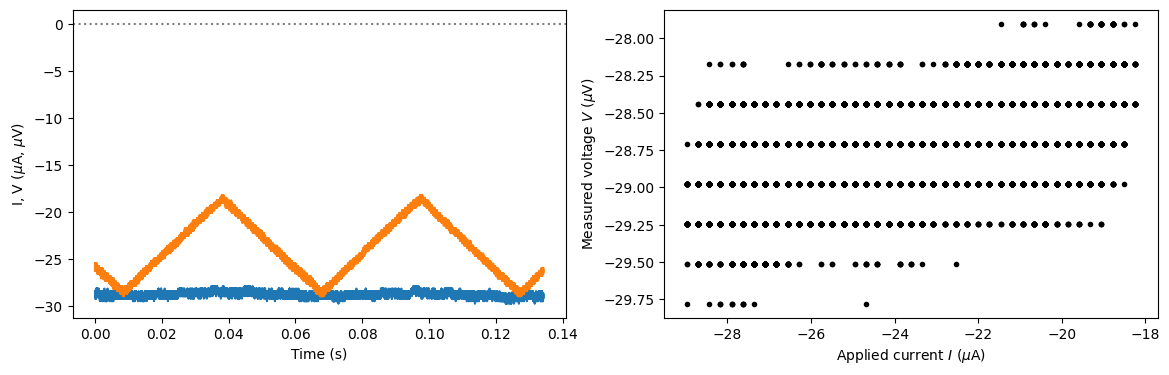

In [10]:
plot_V_I('mrsquid_V-I_2023-02-15-14_36_50.dat')

t,i,v = np.loadtxt('mrsquid_V-I_2023-02-15-14_36_50.dat', unpack=True)
plt.subplots(figsize=(14,4))
plt.subplot(121)
plt.plot(t,v)
plt.plot(t,i)
plt.xlabel("Time (s)")
plt.ylabel("I, V ($\mu$A, $\mu$V)")
plt.axhline(0,ls=':',c='grey')
plt.subplot(122)
plt.plot(i,v,'k.')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$V)")
plt.show()

Interestingly there is the opposite problem here to what happened at room temperature. There were only certain evenly spaced values measured for voltage. Once again I can only assume that this is an artifact of the measurement. Fitting a linear curve through this dataset gives the following result

[  0.04838859 -27.58575432] [0.00065797 0.01590287]


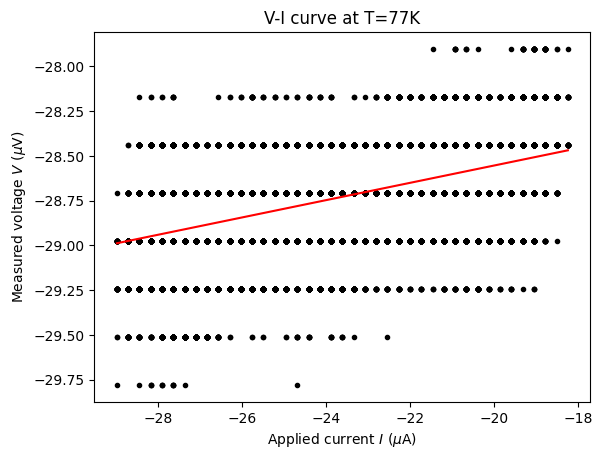

The value of the resistance at the superconducting region is  0.0484 $\pm$ 0.0007 $\Omega$


In [11]:
popt,pcov=curve_fit(linear,i,v) #other arguments to be changed for statistical uncertainty analysis
print(popt,np.sqrt(np.diag(pcov)))
R_superconduct=popt[0]
offset_superconduct=popt[1]
x=np.linspace(min(i),max(i),100)

plt.figure()
plt.plot(i,v,'k.')
plt.plot(x,linear(x,popt[0],popt[1]),'r')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$V)")
plt.title("V-I curve at T=77K")
plt.savefig("/work/figures/V-Isuperconcuctingzoom")
plt.show()
perr=np.sqrt(np.diag(pcov))
print("The value of the resistance at the superconducting region is ",round(popt[0],4),'$\pm$',round(perr[0],4),'$\Omega$')

Why is this not zero? This is an artifact of the measurement setup, it is possibly caused by stray resistance in wires connecting to the SQUID. An other possible source of impedance is stray inductance. The mr SQUID control box was set to oscilospoce mode, which is a reasonnalby fast sweeping mode. The length of the cables was longer than absolutely neccesary so this could be a contributing factor. A third source of interference is the cable connecting to the pt-100 which was also lowered in the liquid nitrogen. This cable was quite long which could act like an antenna. This cable is easily disconnected, so this is something keep in mind for the next experiments.

We have made a lot of measurements of the I-V curve at superconducting temperature, so let's take all these together such that the noise cancels itself while the signal adds to itself. Then, using bin averaging, the resistance can be calculated.

[1.11021371 9.61389117]
[0.00028886 0.03520899]


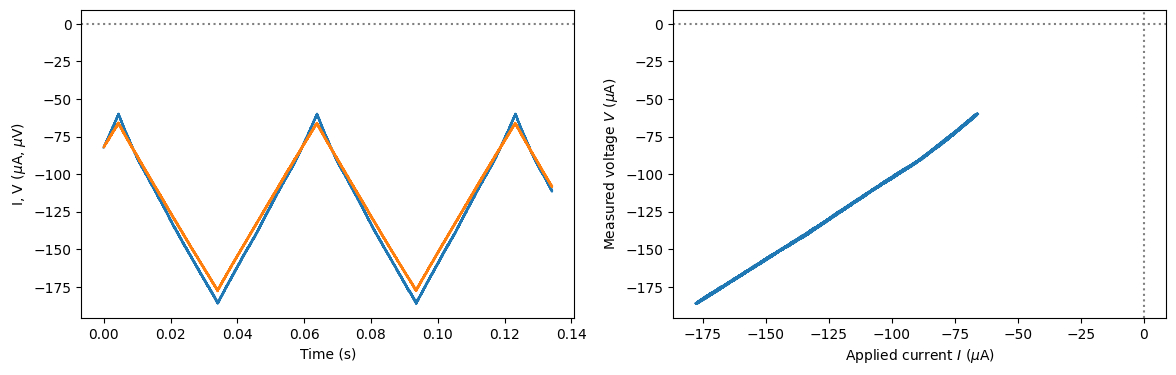

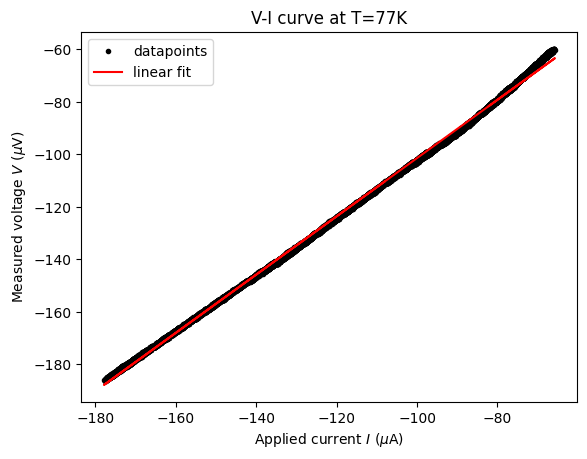

In [12]:
plot_V_I('mrsquid_V-I_2023-02-15-14_35_07.dat')
tt,ii,vv = np.loadtxt('mrsquid_V-I_2023-02-15-14_35_07.dat', unpack=True)
ppopt,ppcov=curve_fit(linear,ii,vv)
print(ppopt)
print(np.sqrt(np.diag(ppcov)))
plt.figure()
plt.plot(ii,vv,'k.',label="datapoints")
plt.plot(ii,linear(ii,*ppopt),'r',label="linear fit")
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$V)")
plt.title("V-I curve at T=77K")
plt.savefig("/work/figures/V-Ipostcriticalzoom")
plt.legend()
plt.show()

In [13]:
#lets load in all relevant data files

#t,i,v = np.loadtxt('mrsquid_V-I_2023-02-15-14_36_50.dat', unpack=True)

t_1,i_1,v_1 = np.loadtxt('mrsquid_V-I_2023-02-15-14_31_41.dat', unpack=True)
t_2,i_2,v_2 = np.loadtxt('mrsquid_V-I_2023-02-15-14_34_58.dat', unpack=True)
t_3,i_3,v_3 = np.loadtxt('mrsquid_V-I_2023-02-15-14_36_50.dat', unpack=True)
t_4,i_4,v_4 = np.loadtxt('mrsquid_V-I_2023-02-15-14_37_10.dat', unpack=True)
t_5,i_5,v_5 = np.loadtxt('mrsquid_V-I_2023-02-15-14_46_26.dat', unpack=True)
t_6,i_6,v_6 = np.loadtxt('mrsquid_V-I_2023-02-15-14_46_27.dat', unpack=True)
t_7,i_7,v_7 = np.loadtxt('mrsquid_V-I_2023-02-15-14_46_29.dat', unpack=True)
t_8,i_8,v_8 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_01.dat', unpack=True)
t_9,i_9,v_9 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_03.dat', unpack=True)
t_10,i_10,v_10 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_04.dat', unpack=True)
t_11,i_11,v_11 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_05.dat', unpack=True)
t_12,i_12,v_12 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_06.dat', unpack=True)
t_13,i_13,v_13 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_07.dat', unpack=True)
t_14,i_14,v_14 = np.loadtxt('mrsquid_V-I_2023-02-15-14_50_05.dat', unpack=True)

#lets concatenate all data together
t_total=np.concatenate((t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12,t_13,t_14))
i_total=np.concatenate((i_1,i_2,i_3,i_4,i_5,i_6,i_7,i_8,i_9,i_10,i_11,i_12,i_13,i_14))
v_total=np.concatenate((v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14))
print(len(i_total))




229376


To analyse this dataset we are going to use the bucket filtering technique also used for the room temperature measurement.

In [14]:
# An appropriate averaging code to use 
# (see https://github.com/gsteele13/gary-misc-notebooks/blob/master/Bin%20Average.md)

#def binaverage(x, navg):
#    N = len(x) // navg
#    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)
#
## We use this array to index the original arrays, and then send that to the binaverage routine
#i_f = binaverage(i_s,n)
#v_f = binaverage(v_s,n)
#
#plt.plot(i_f,v_f,'y.')
#plt.xlabel("Applied current $I$ ($\mu$A)")
#plt.ylabel("Measured voltage $V$ ($\mu$V)")
#plt.show()

Here is a plot of the resistance as a function of the applied current. There is not a clear jump, there is more of a transition region. In blue are the calculated critical currents from later in this notebook.

# Finding the knees and the critical current

# Critical current for many datasets

In [15]:
t_1,i_1,v_1 = np.loadtxt('mrsquid_V-I_2023-02-15-14_31_41.dat', unpack=True)
t_2,i_2,v_2 = np.loadtxt('mrsquid_V-I_2023-02-15-14_34_58.dat', unpack=True)
t_3,i_3,v_3 = np.loadtxt('mrsquid_V-I_2023-02-15-14_36_50.dat', unpack=True)
t_4,i_4,v_4 = np.loadtxt('mrsquid_V-I_2023-02-15-14_37_10.dat', unpack=True)
t_5,i_5,v_5 = np.loadtxt('mrsquid_V-I_2023-02-15-14_46_26.dat', unpack=True)
t_6,i_6,v_6 = np.loadtxt('mrsquid_V-I_2023-02-15-14_46_27.dat', unpack=True)
t_7,i_7,v_7 = np.loadtxt('mrsquid_V-I_2023-02-15-14_46_29.dat', unpack=True)
t_8,i_8,v_8 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_01.dat', unpack=True)
t_9,i_9,v_9 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_03.dat', unpack=True)
t_10,i_10,v_10 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_04.dat', unpack=True)
t_11,i_11,v_11 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_05.dat', unpack=True)
t_12,i_12,v_12 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_06.dat', unpack=True)
t_13,i_13,v_13 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_07.dat', unpack=True)
t_14,i_14,v_14 = np.loadtxt('mrsquid_V-I_2023-02-15-14_50_05.dat', unpack=True)


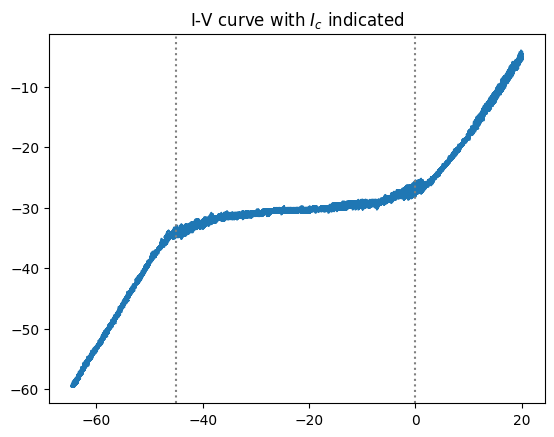

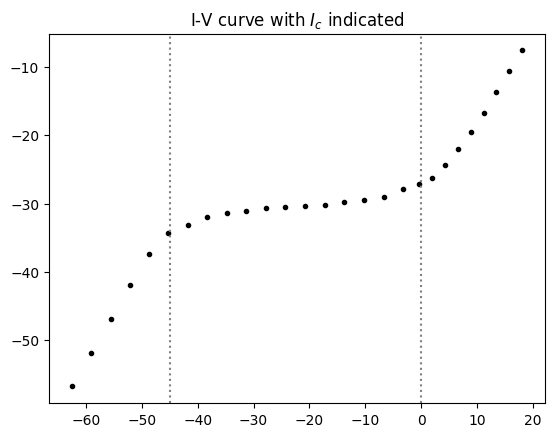

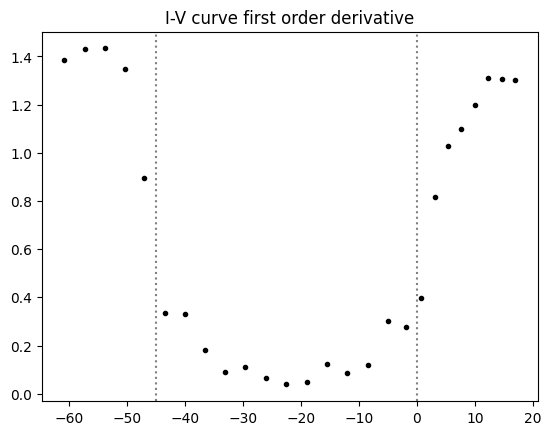

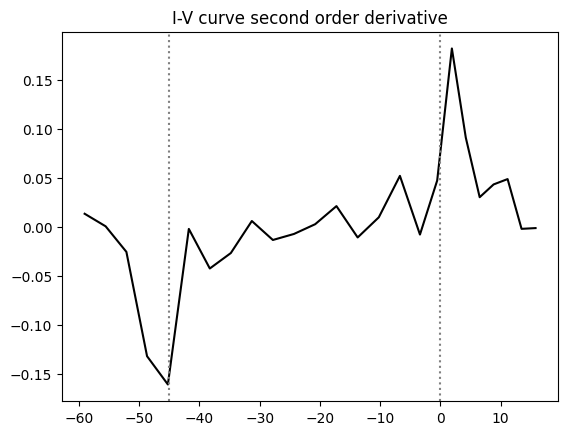

In [16]:
leftIC=-45
rightIC=0
plt.figure()
plt.plot(i_1,v_1)
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve with $I_c$ indicated")
plt.show()

# The number of points we will average together
n=600

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_1)

i_s = i_1[ind]
v_s = v_1[ind]
def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.figure()
plt.plot(i_f,v_f,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve with $I_c$ indicated")
plt.show()

#now we need to take the difference to determine where the knees are
di = np.diff(i_f)
dv = np.diff(v_f)

# Now we calculate R
first_order_derivative = dv/di

# Note that R has one less point than i: we need to define a new i vector with fewer points
# This line of code will do that and make our calculation above equivalent to the center
# difference approximation of the derivative
i_new = (i_f[1:]+i_f[:-1])/2

plt.figure()
plt.plot(i_new,first_order_derivative,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve first order derivative")
plt.show()

ddi=np.diff(i_new)
ddv=np.diff(first_order_derivative)
second_order_derivative=ddv/ddi
i_newnew = (i_new[1:]+i_new[:-1])/2
#this second order derivatie is maximal at the I_c

plt.figure()
plt.plot(i_newnew,second_order_derivative,'k')
plt.axvline(-45,ls=':',c="grey")
plt.axvline(0,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve second order derivative")
plt.show()
#now lets find the values of the extremes
I_c1=rightIC-leftIC


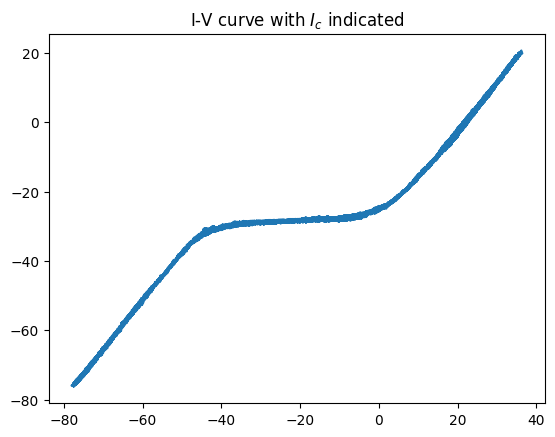

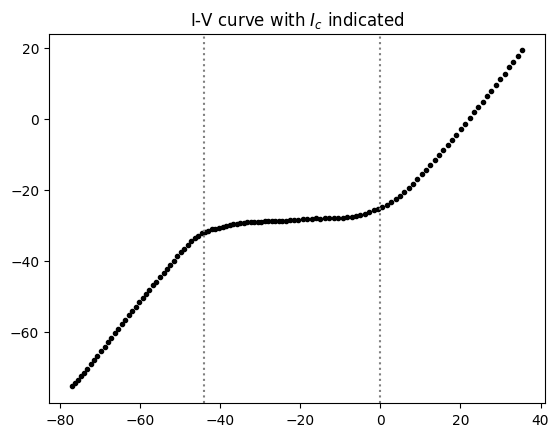

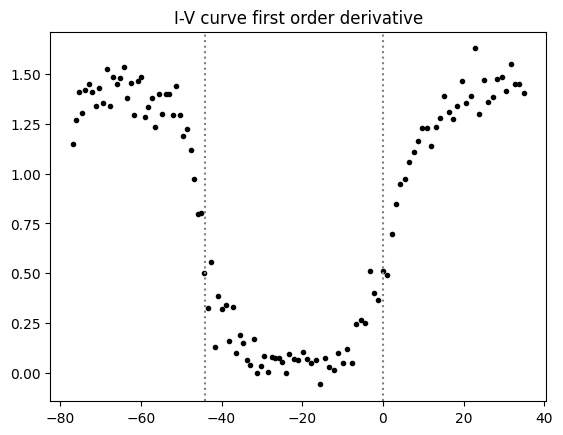

In [17]:
plt.figure()
plt.plot(i_2,v_2)
#plt.axvline(-41,ls=':',c="grey")
#plt.axvline(0,ls=':',c="grey")
plt.title("I-V curve with $I_c$ indicated")
plt.show()

leftIC=-44
rightIC=0
# The number of points we will average together
n=140

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_2)

i_s = i_2[ind]
v_s = v_2[ind]
def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.figure()
plt.plot(i_f,v_f,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
plt.title("I-V curve with $I_c$ indicated")
plt.show()

#now we need to take the difference to determine where the knees are
di = np.diff(i_f)
dv = np.diff(v_f)

first_order_derivative = dv/di
i_new = (i_f[1:]+i_f[:-1])/2

plt.figure()
plt.plot(i_new,first_order_derivative,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
plt.title("I-V curve first order derivative")
plt.show()
I_c2=rightIC-leftIC


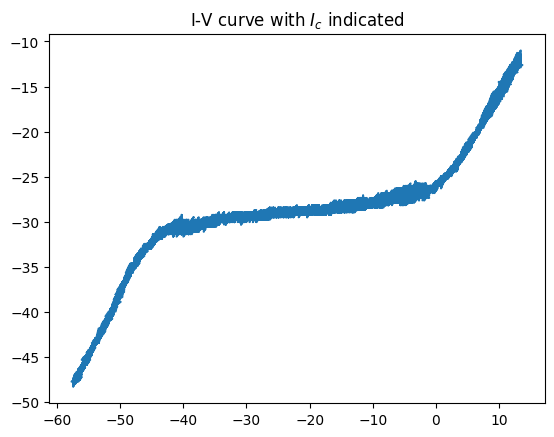

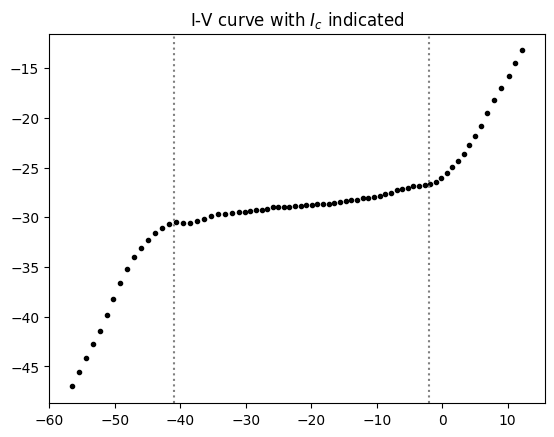

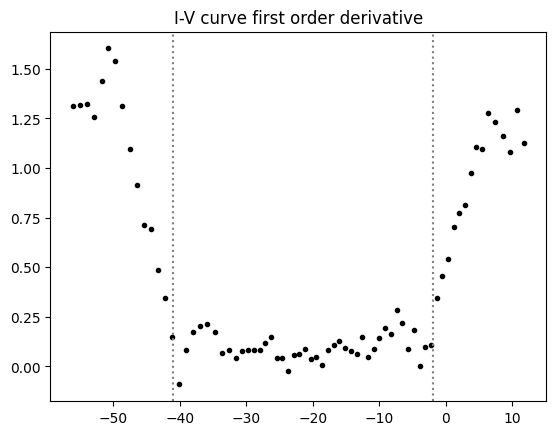

In [18]:
plt.figure()
plt.plot(i_5,v_5)
#plt.axvline(-43,ls=':',c="grey")
#plt.axvline(-2,ls=':',c="grey")
plt.title("I-V curve with $I_c$ indicated")
plt.show()

leftIC=-41
rightIC=-2
# The number of points we will average together
n=220

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_5)

i_s = i_5[ind]
v_s = v_5[ind]
def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.figure()
plt.plot(i_f,v_f,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve with $I_c$ indicated")
plt.show()

#now we need to take the difference to determine where the knees are
di = np.diff(i_f)
dv = np.diff(v_f)

first_order_derivative = dv/di
i_new = (i_f[1:]+i_f[:-1])/2

plt.figure()
plt.plot(i_new,first_order_derivative,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
plt.title("I-V curve first order derivative")
plt.show()
I_c5=rightIC-leftIC


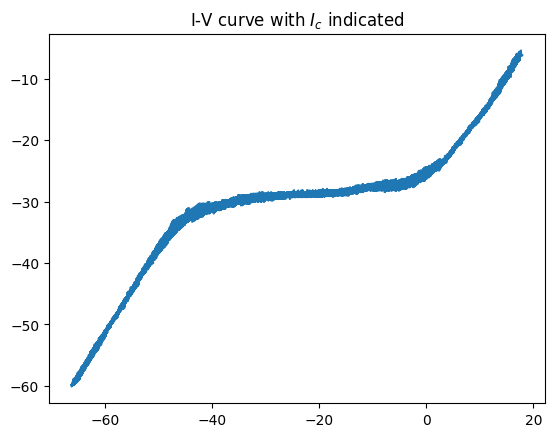

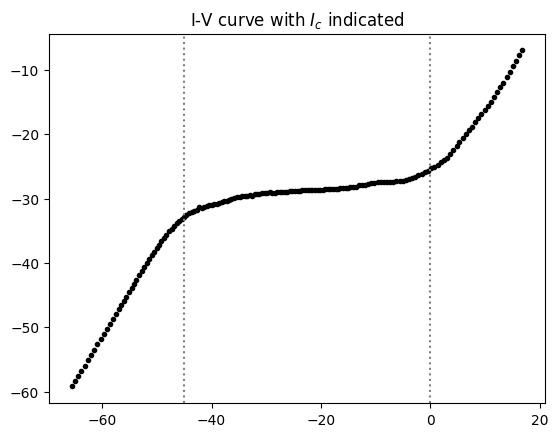

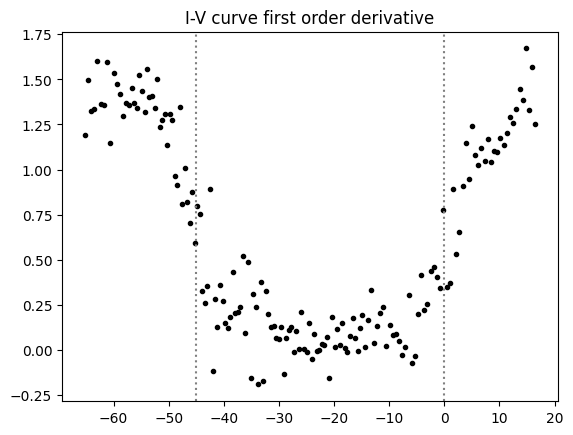

In [19]:
plt.figure()
plt.plot(i_4,v_4)
#plt.axvline(-40,ls=':',c="grey")
#plt.axvline(0,ls=':',c="grey")
plt.title("I-V curve with $I_c$ indicated")
plt.show()

leftIC=-45
rightIC=0
# The number of points we will average together
n=100

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_4)

i_s = i_4[ind]
v_s = v_4[ind]
def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.figure()
plt.plot(i_f,v_f,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve with $I_c$ indicated")
plt.show()

#now we need to take the difference to determine where the knees are
di = np.diff(i_f)
dv = np.diff(v_f)

first_order_derivative = dv/di
i_new = (i_f[1:]+i_f[:-1])/2

plt.figure()
plt.plot(i_new,first_order_derivative,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
plt.title("I-V curve first order derivative")
plt.show()
I_c4=rightIC-leftIC


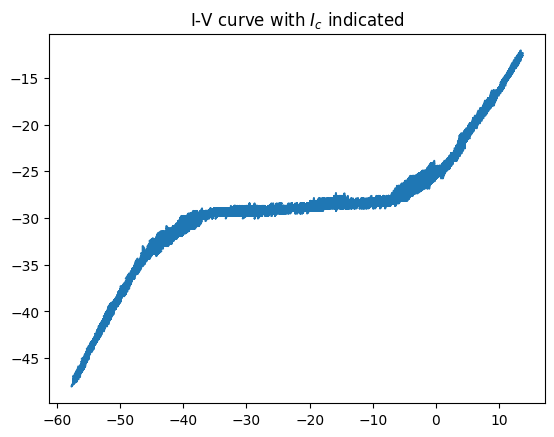

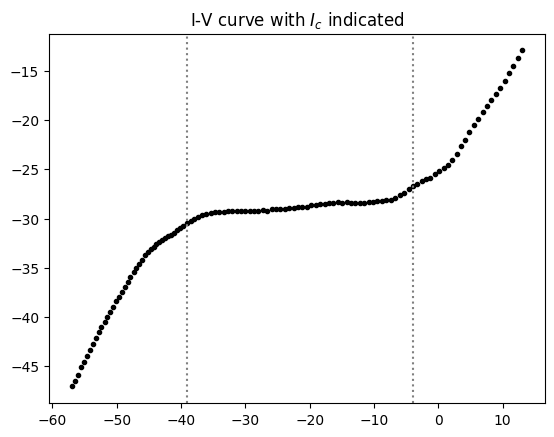

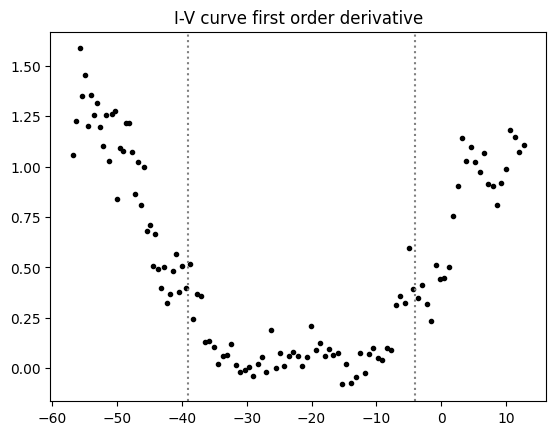

In [20]:
plt.figure()
plt.plot(i_6,v_6)
#plt.axvline(-40,ls=':',c="grey")
plt.title("I-V curve with $I_c$ indicated")
#plt.axvline(0,ls=':',c="grey")
plt.show()

leftIC=-39
rightIC=-4
# The number of points we will average together
n=140

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_6)

i_s = i_6[ind]
v_s = v_6[ind]
def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.figure()
plt.plot(i_f,v_f,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve with $I_c$ indicated")
plt.show()

#now we need to take the difference to determine where the knees are
di = np.diff(i_f)
dv = np.diff(v_f)

first_order_derivative = dv/di
i_new = (i_f[1:]+i_f[:-1])/2

plt.figure()
plt.plot(i_new,first_order_derivative,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
plt.title("I-V curve first order derivative")
plt.show()
I_c6=rightIC-leftIC


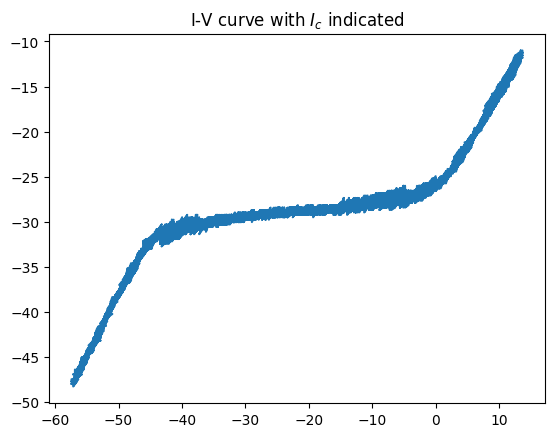

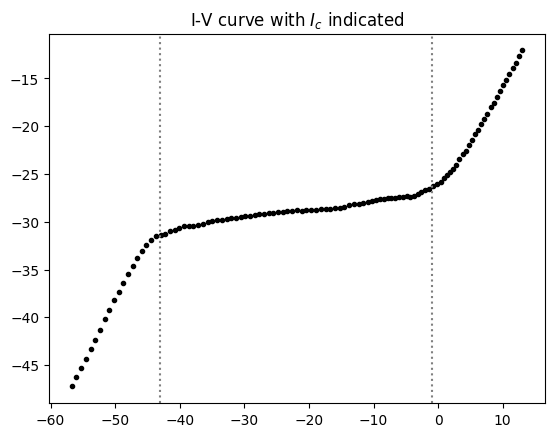

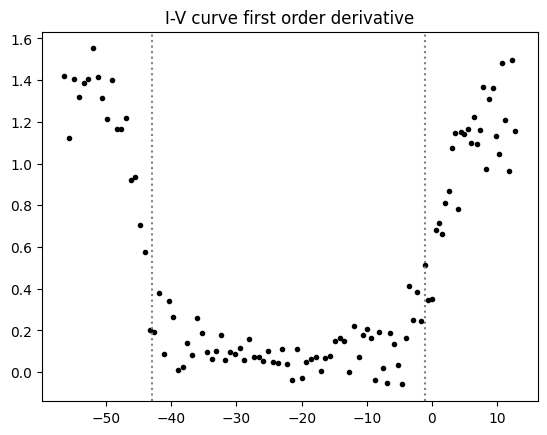

In [21]:
plt.figure()
plt.plot(i_7,v_7)
#plt.axvline(-40,ls=':',c="grey")
#plt.axvline(0,ls=':',c="grey")
plt.title("I-V curve with $I_c$ indicated")
plt.show()

leftIC=-43
rightIC=-1
# The number of points we will average together
n=150

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_7)

i_s = i_7[ind]
v_s = v_7[ind]
def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.figure()
plt.plot(i_f,v_f,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve with $I_c$ indicated")
plt.show()

#now we need to take the difference to determine where the knees are
di = np.diff(i_f)
dv = np.diff(v_f)

first_order_derivative = dv/di
i_new = (i_f[1:]+i_f[:-1])/2

plt.figure()
plt.plot(i_new,first_order_derivative,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
plt.title("I-V curve first order derivative")
plt.show()
I_c7=rightIC-leftIC


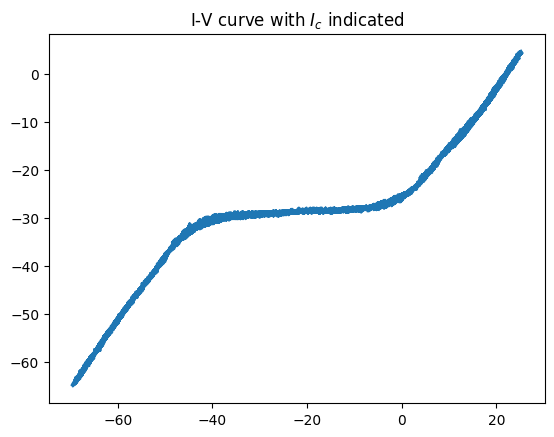

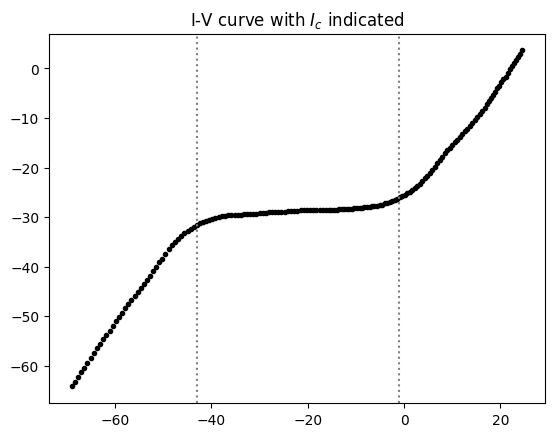

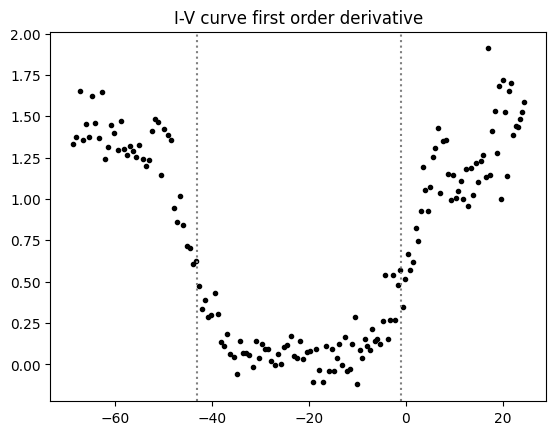

In [22]:
plt.figure()
plt.plot(i_8,v_8)
#plt.axvline(-40,ls=':',c="grey")
#plt.axvline(0,ls=':',c="grey")
plt.title("I-V curve with $I_c$ indicated")
plt.show()

leftIC=-43
rightIC=-1
# The number of points we will average together
n=100

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_8)

i_s = i_8[ind]
v_s = v_8[ind]
def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.figure()
plt.plot(i_f,v_f,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve with $I_c$ indicated")
plt.show()

#now we need to take the difference to determine where the knees are
di = np.diff(i_f)
dv = np.diff(v_f)

first_order_derivative = dv/di
i_new = (i_f[1:]+i_f[:-1])/2

plt.figure()
plt.plot(i_new,first_order_derivative,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
plt.title("I-V curve first order derivative")
plt.show()
I_c8=rightIC-leftIC


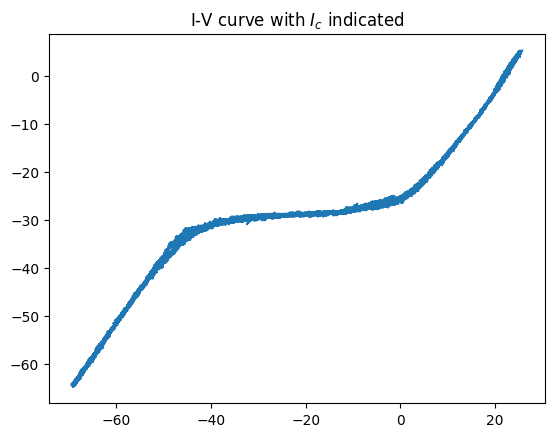

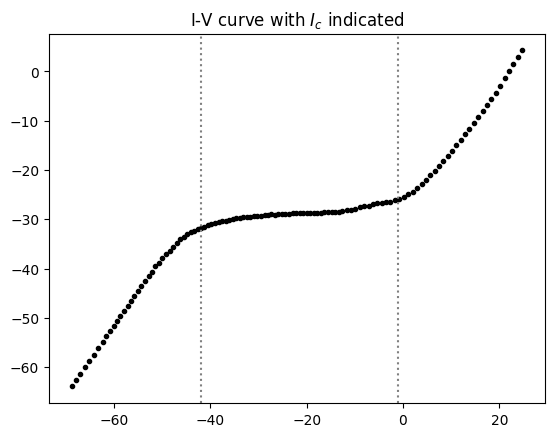

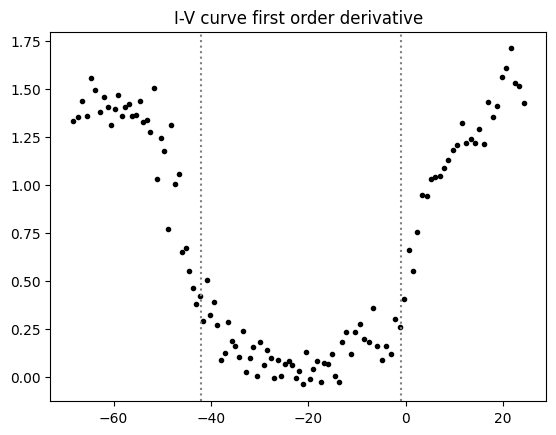

In [23]:
plt.figure()
plt.plot(i_9,v_9)
#plt.axvline(-40,ls=':',c="grey")
#plt.axvline(0,ls=':',c="grey")
plt.title("I-V curve with $I_c$ indicated")
plt.show()

leftIC=-42
rightIC=-1
# The number of points we will average together
n=140

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_9)

i_s = i_9[ind]
v_s = v_9[ind]
def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.figure()
plt.plot(i_f,v_f,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve with $I_c$ indicated")
plt.show()

#now we need to take the difference to determine where the knees are
di = np.diff(i_f)
dv = np.diff(v_f)

first_order_derivative = dv/di
i_new = (i_f[1:]+i_f[:-1])/2

plt.figure()
plt.plot(i_new,first_order_derivative,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
plt.title("I-V curve first order derivative")
plt.show()

I_c9=rightIC-leftIC

#there is a transition region for the Ic so the value is determined by hand with an uncertainty of 2 uA
#R=0.5 is the aim

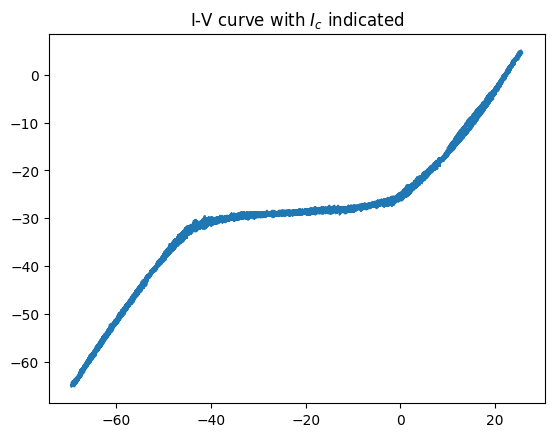

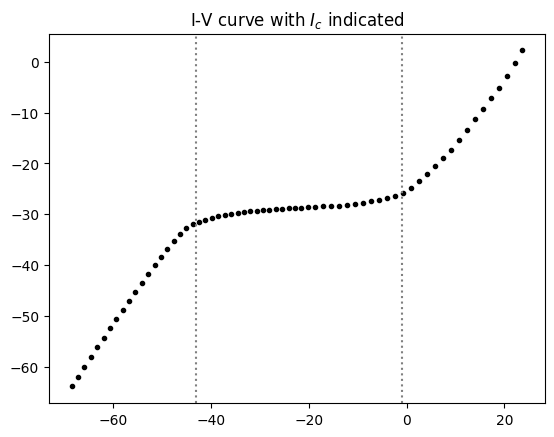

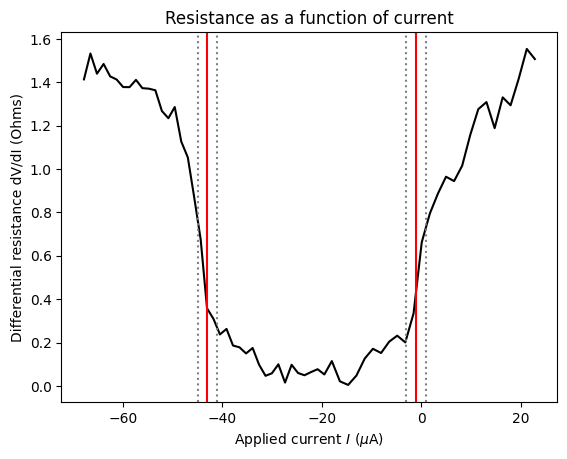

In [32]:
plt.figure()
plt.plot(i_10,v_10)
#plt.axvline(-40,ls=':',c="grey")
#plt.axvline(0,ls=':',c="grey")
plt.title("I-V curve with $I_c$ indicated")
plt.show()

leftIC=-43
rightIC=-1
# The number of points we will average together
n=250

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_10)

i_s = i_10[ind]
v_s = v_10[ind]
def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.figure()
plt.plot(i_f,v_f,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve with $I_c$ indicated")
plt.show()

#now we need to take the difference to determine where the knees are
di = np.diff(i_f)
dv = np.diff(v_f)

first_order_derivative = dv/di
i_new = (i_f[1:]+i_f[:-1])/2

plt.figure()
plt.plot(i_new,first_order_derivative,'k')
plt.axvline(leftIC,c="red")
plt.axvline(leftIC+2,ls=':',c="grey")
plt.axvline(leftIC-2,ls=':',c="grey")

plt.axvline(rightIC,c="red")
plt.axvline(rightIC+2,ls=':',c='grey')
plt.axvline(rightIC-2,ls=':',c='grey')
plt.title("Resistance as a function of current")
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Differential resistance dV/dI (Ohms)")
plt.savefig("/work/figures/ICdetermination")
plt.show()
I_c10=rightIC-leftIC


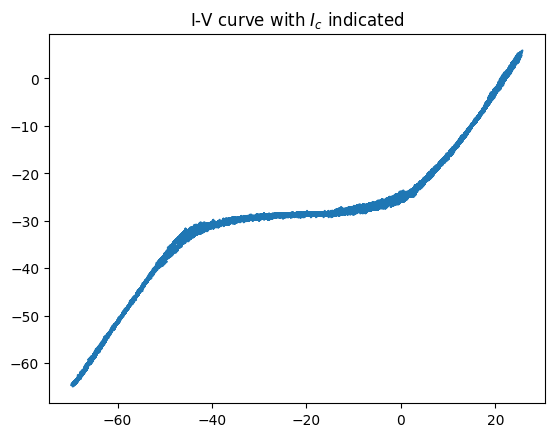

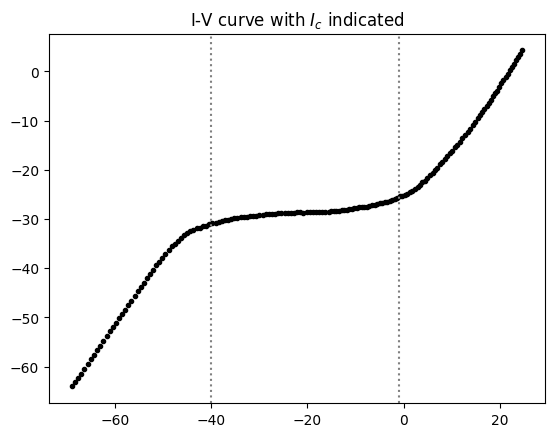

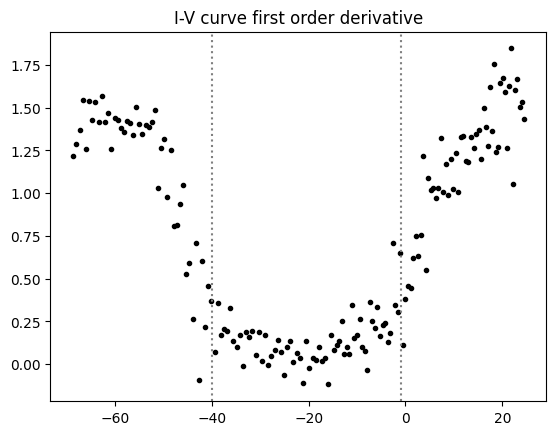

In [25]:
plt.figure()
plt.plot(i_11,v_11)
#plt.axvline(-40,ls=':',c="grey")
#plt.axvline(0,ls=':',c="grey")
plt.title("I-V curve with $I_c$ indicated")
plt.show()

leftIC=-40
rightIC=-1
# The number of points we will average together
n=100

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_11)

i_s = i_11[ind]
v_s = v_11[ind]
def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.figure()
plt.plot(i_f,v_f,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve with $I_c$ indicated")
plt.show()

#now we need to take the difference to determine where the knees are
di = np.diff(i_f)
dv = np.diff(v_f)

first_order_derivative = dv/di
i_new = (i_f[1:]+i_f[:-1])/2

plt.figure()
plt.plot(i_new,first_order_derivative,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
plt.title("I-V curve first order derivative")
plt.show()
I_c11=rightIC-leftIC


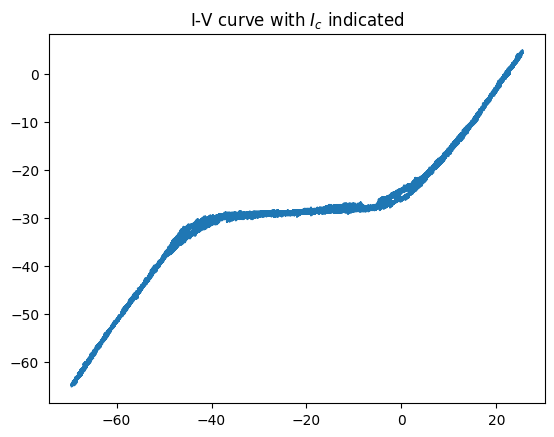

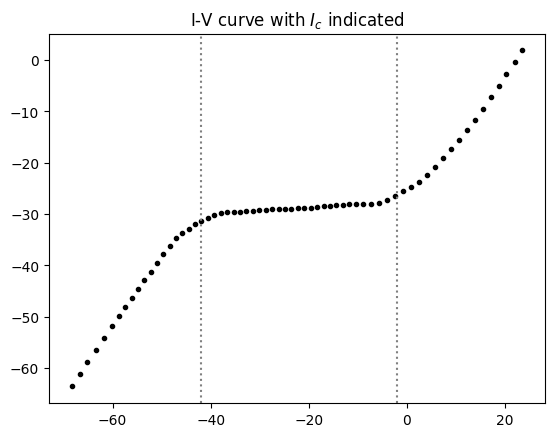

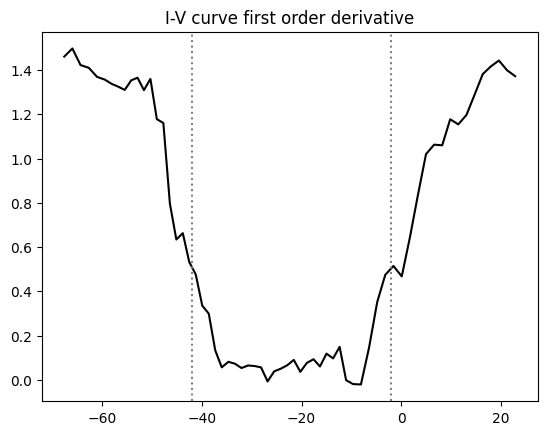

In [26]:
plt.figure()
plt.plot(i_12,v_12)
#plt.axvline(-40,ls=':',c="grey")
#plt.axvline(0,ls=':',c="grey")
plt.title("I-V curve with $I_c$ indicated")
plt.show()

leftIC=-42
rightIC=-2
# The number of points we will average together
n=250

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_12)

i_s = i_12[ind]
v_s = v_12[ind]
def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.figure()
plt.plot(i_f,v_f,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve with $I_c$ indicated")
plt.show()

#now we need to take the difference to determine where the knees are
di = np.diff(i_f)
dv = np.diff(v_f)

first_order_derivative = dv/di
i_new = (i_f[1:]+i_f[:-1])/2

plt.figure()
plt.plot(i_new,first_order_derivative,'k')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
plt.title("I-V curve first order derivative")
plt.show()
I_c12=rightIC-leftIC


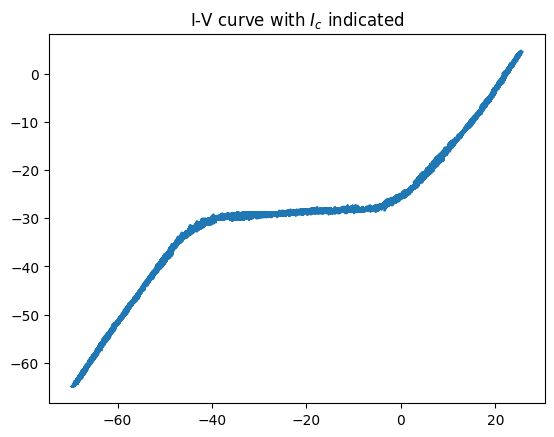

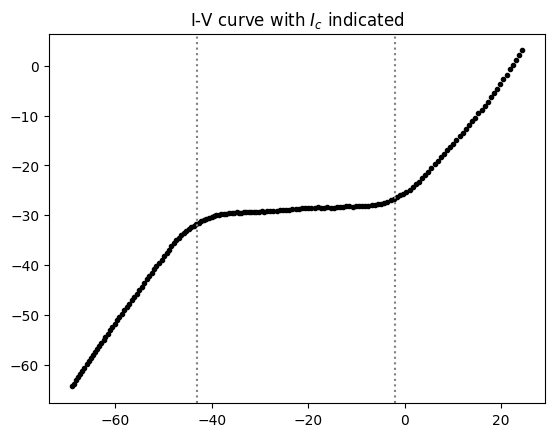

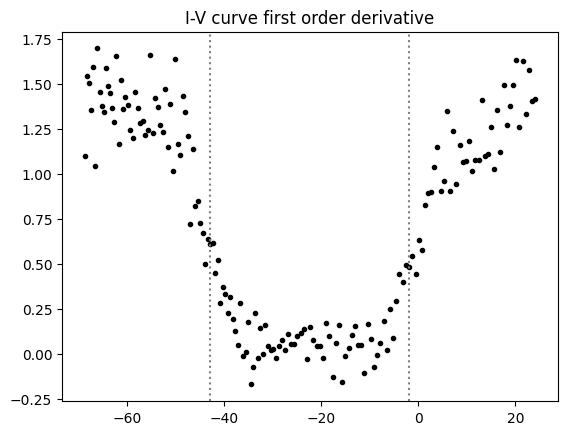

In [27]:
plt.figure()
plt.plot(i_13,v_13)
#plt.axvline(-40,ls=':',c="grey")
#plt.axvline(0,ls=':',c="grey")
plt.title("I-V curve with $I_c$ indicated")
plt.show()

leftIC=-43
rightIC=-2
# The number of points we will average together
n=100

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_13)

i_s = i_13[ind]
v_s = v_13[ind]
def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.figure()
plt.plot(i_f,v_f,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve with $I_c$ indicated")
plt.show()

#now we need to take the difference to determine where the knees are
di = np.diff(i_f)
dv = np.diff(v_f)

first_order_derivative = dv/di
i_new = (i_f[1:]+i_f[:-1])/2

plt.figure()
plt.plot(i_new,first_order_derivative,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
plt.title("I-V curve first order derivative")
plt.show()
I_c13=rightIC-leftIC


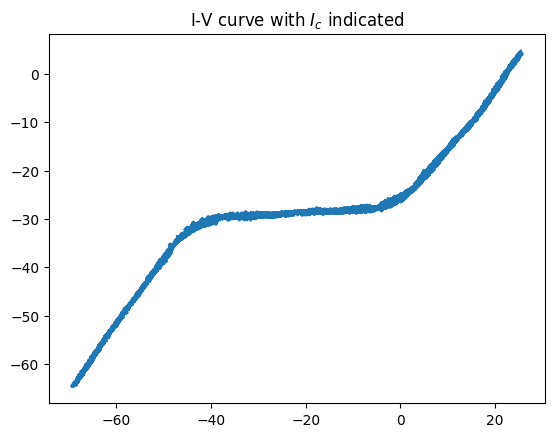

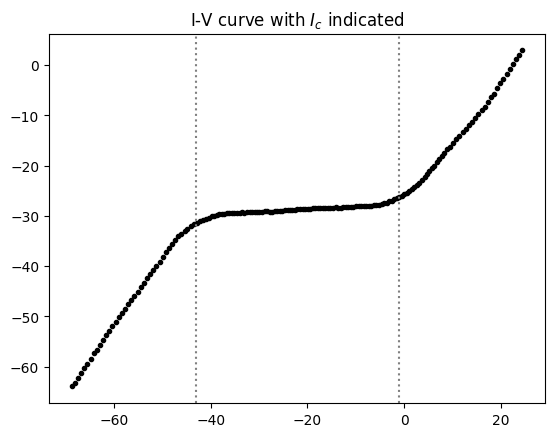

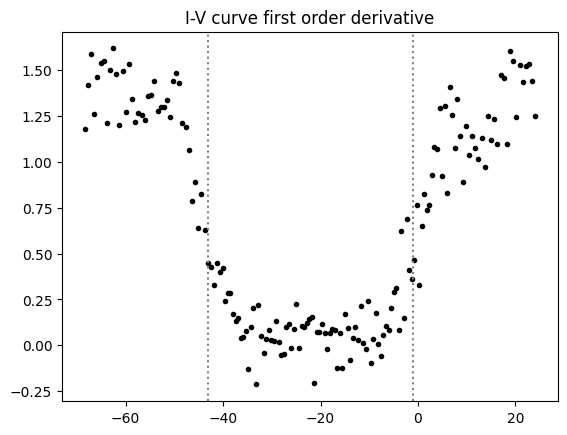

In [28]:
plt.figure()
plt.plot(i_14,v_14)
#plt.axvline(-40,ls=':',c="grey")
#plt.axvline(0,ls=':',c="grey")
plt.title("I-V curve with $I_c$ indicated")
plt.show()

leftIC=-43
rightIC=-1
# The number of points we will average together
n=100

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_14)

i_s = i_14[ind]
v_s = v_14[ind]
def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.figure()
plt.plot(i_f,v_f,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
#plt.plot(i_1,linear(i_1,R_superconduct,offset_superconduct),'r')
plt.title("I-V curve with $I_c$ indicated")
plt.show()

#now we need to take the difference to determine where the knees are
di = np.diff(i_f)
dv = np.diff(v_f)

first_order_derivative = dv/di
i_new = (i_f[1:]+i_f[:-1])/2

plt.figure()
plt.plot(i_new,first_order_derivative,'k.')
plt.axvline(leftIC,ls=':',c="grey")
plt.axvline(rightIC,ls=':',c="grey")
plt.title("I-V curve first order derivative")
plt.show()
I_c14=rightIC-leftIC


In [29]:
I_c=np.array([I_c1,I_c2,I_c4,I_c5,I_c6,I_c7,I_c8,I_c9,I_c10,I_c11,I_c12,I_c13,I_c14])*0.5
#Half because there is two times I_c between the two knees
print(I_c)
u_I_c=np.ones(len(I_c))*2 #uA
#the uncertainty of one estimated I_c is 1 uA, which I have chosen based om
#the ambiguety concerning where the critical current is exactly
#two estimations are made to find one value of I_c, however since tis is double the value of I_c,
#the uncerainty gets halved again to 1 uA
print(u_I_c)
#these are the measured values of I_c
#Let's determine the average value of this measurement and the uncertainty
I_c_average=np.mean(I_c)
print(I_c_average)
u_I_c_average=(np.mean(I_c+u_I_c)-np.mean(I_c-u_I_c))/2
print(u_I_c_average)

[22.5 22.  22.5 19.5 17.5 21.  21.  20.5 21.  19.5 20.  20.5 21. ]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
20.653846153846153
2.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7f259f03-5088-4677-bb0a-bf6373cc6341' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>